 # Project

## Synthesising a Dataset for Car Details

### Goal

The goal of this project is to create a data set by simulating car sales in Ireland and creating variables such as the county it was sold in, the colour of it, its type and price deprication because of its colour.

For the project the following had to be carried out:

• Create a dataset for a real-world phenomenon that can be measured with at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail the research and implement the simulation in a Jupyter notebook with the data set displayed in an output cell within the notebook.

### Information on the Car Dataset

The car dataset will simulate a data set for new car sales in Ireland. The main data will come from information and datasets on Motorstats [1]. From here the sales per car per car type, month sold, colour and county will be used to help create the data.

After this a sales price will be given to each car for what it sold at. The Society of the Irish Motor Industry keeps a record every year of pricing documents for new cars for sale in Ireland [2]. This will be used to help give each car record a price.

Lastly each car record will have a sale price 3 years after taking into account its price, colour and price deprecation. The resale value of a car has been found to be effected by the colour of the car [3]. For the price deprication a study of 1.6 million US cars sales after 3 years with the colour of the car being measured will be used [4].

## Creating the Dataset

### Read in the stats and variables to be used

In [821]:
# Import libraries
# Numpy for arrays and mathematical functions
import numpy as np
# Pandas for loading the dataset to dataframes for easy manipulation
import pandas as pd
# Matplotlib for ploting and visualising the data
import matplotlib.pyplot as plt

Data for the sales per month is gotton from SIMI [1]. For this project the year 2019 will be used due to 2020 and 2021 car sales being effected by the pandemic. An excel with that info can be read in using pandas. 

In [822]:
montly_sales_df = pd.read_excel("total-car-registrations.xlsx", skiprows=6, usecols="B:M")  

Prep the data by transposing it, naming the column to relevent and then printing to screen

In [823]:
montly_sales_df = montly_sales_df.T

In [824]:
montly_sales_df.columns = ['Sales']

In [825]:
montly_sales_df

,Sales
Jan,32370
Feb,15069
Mar,16687
Apr,8904
May,6320
Jun,1408
Jul,24681
Aug,5088
Sep,3418
Oct,2179


The sales for 2019 can be shown in the graph below with January and July showing the greatest numbers.

Text(0.5, 1.0, 'Irish Car Sales by Month 2019')

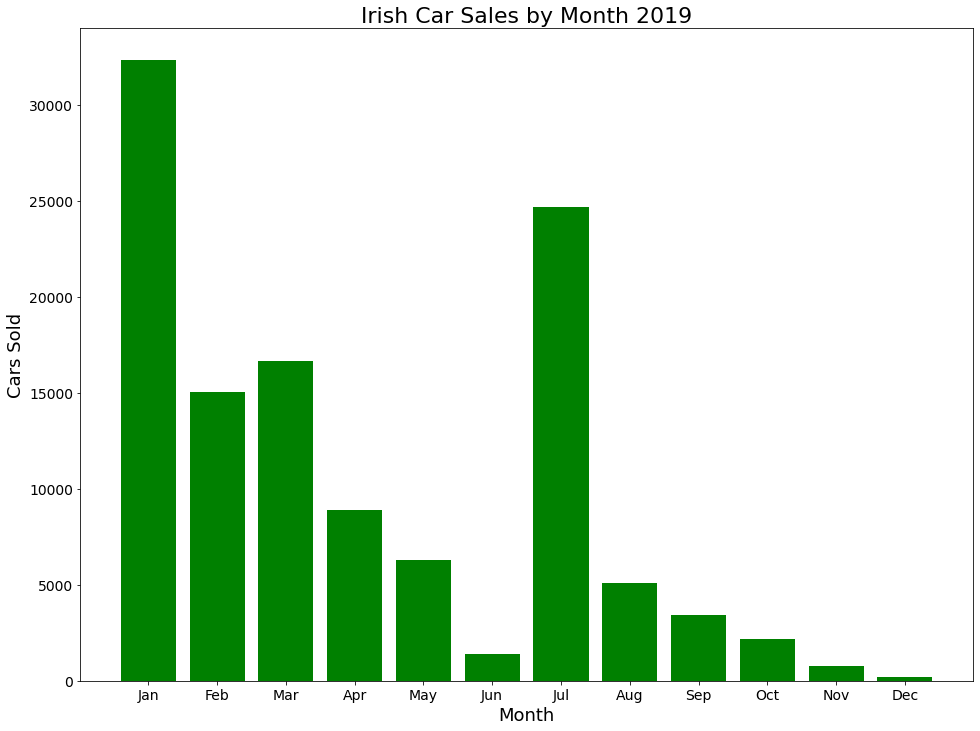

In [826]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and month data from the dataset in green
plt.bar(montly_sales_df.index, montly_sales_df["Sales"], color='green')
# Add labels to the x,y axis and increase size
plt.xlabel('Month', size=18)
plt.ylabel('Cars Sold', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Month 2019", size=22)

The county sales variables will also be taking from SIMI [1]. The dataset can be seen below.

In [827]:
county_sales_df = pd.read_excel("passenger-cars-by-county.xlsx", skiprows=6, usecols="B:D")  

In [828]:
county_sales_df

,County,2019 Units,% Share
0,Carlow,1255,1.07
1,Cavan,1167,1.00
2,Clare,2245,1.92
3,Cork,13981,11.94
4,Donegal,2331,1.99
5,Dublin,52067,44.46
6,Galway,4300,3.67
7,Kerry,2310,1.97
8,Kildare,4452,3.80
9,Kilkenny,2066,1.76


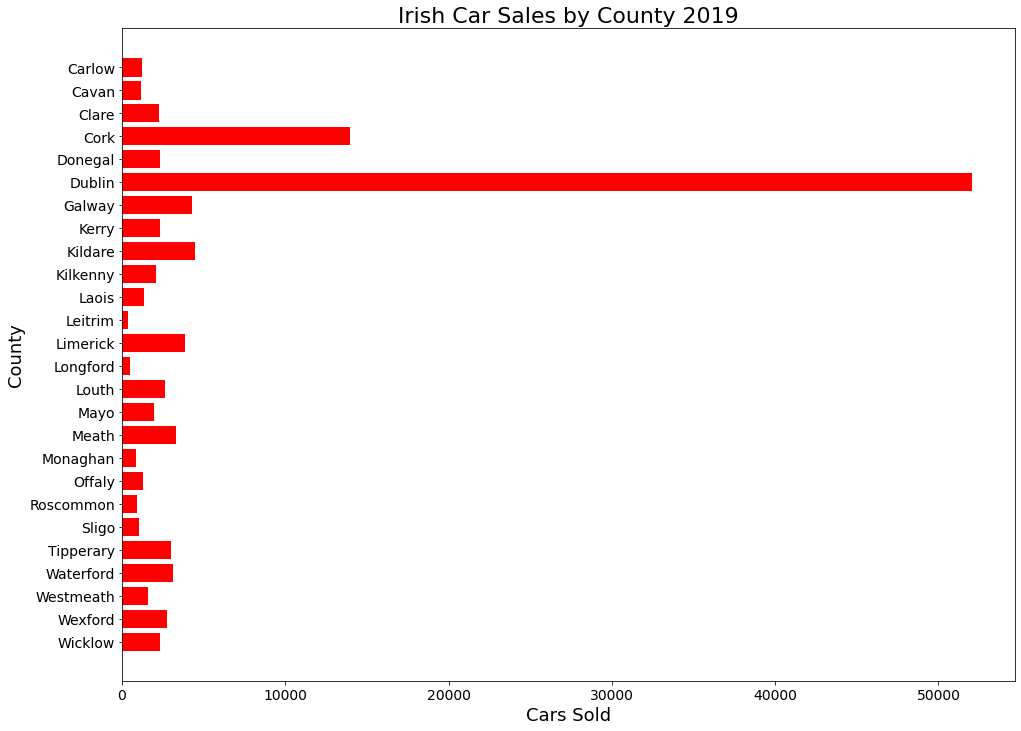

In [829]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and county data from the dataset in red
plt.barh(county_sales_df["County"], county_sales_df["2019 Units"], color='red')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('County', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by County 2019", size=22)
# Reverse order of y axis to match the data alphabetical county order for readability
plt.gca().invert_yaxis()

In [830]:
car_model_sales_df = pd.read_excel("passenger-cars-by-model.xlsx", skiprows=6, usecols="A:E")

In [831]:
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share
0,1,TOYOTA,COROLLA,4406,3.76
1,2,HYUNDAI,TUCSON,3828,3.27
2,3,NISSAN,QASHQAI,3748,3.20
3,4,VOLKSWAGEN,TIGUAN,3201,2.73
4,5,SKODA,OCTAVIA,3199,2.73
5,6,HYUNDAI,KONA,2939,2.51
6,7,VOLKSWAGEN,GOLF,2823,2.41
7,8,FORD,FOCUS,2766,2.36
8,9,TOYOTA,YARIS,2554,2.18
9,10,TOYOTA,C-HR,2503,2.14


In [832]:
# Limit the data the top 12 Cars in 2019 for ease of working with the data.
# This is instead of the 297 differnet makes of car from the data
car_model_sales_df = car_model_sales_df.head(12)

In [833]:
# Display cleaned up data
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share
0,1,TOYOTA,COROLLA,4406,3.76
1,2,HYUNDAI,TUCSON,3828,3.27
2,3,NISSAN,QASHQAI,3748,3.20
3,4,VOLKSWAGEN,TIGUAN,3201,2.73
4,5,SKODA,OCTAVIA,3199,2.73
5,6,HYUNDAI,KONA,2939,2.51
6,7,VOLKSWAGEN,GOLF,2823,2.41
7,8,FORD,FOCUS,2766,2.36
8,9,TOYOTA,YARIS,2554,2.18
9,10,TOYOTA,C-HR,2503,2.14


Text(0.5, 1.0, 'Irish Car Sales by Make & Model 2019')

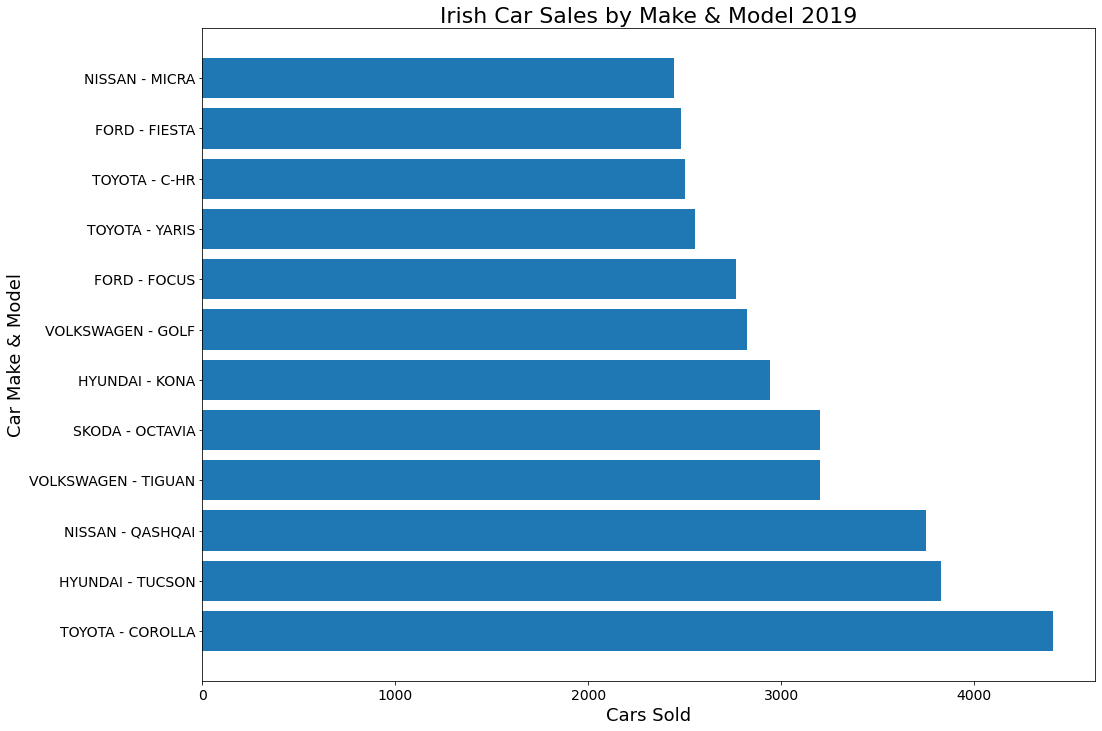

In [834]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and make/model data from the dataset
plt.barh(car_model_sales_df["Make"] + " - " + car_model_sales_df["Model"], car_model_sales_df["2019 Units"])
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Make & Model', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Make & Model 2019", size=22)

In [835]:
colour_sales_df = pd.read_excel("passenger-cars-by-colour.xlsx", skiprows=6, usecols="A:G")

In [836]:
colour_sales_df

,Rank,Colour,2019 Units,% Share
0,1,Grey,43535,37.17
1,2,Black,21021,17.95
2,3,White/Ivory,17359,14.82
3,4,Blue,16666,14.23
4,5,Red/Maroon,13710,11.71
5,6,Brown,1791,1.53
6,7,Green,730,0.62
7,8,Orange,714,0.61
8,9,White/Ivory and Black,306,0.26
9,10,Red/Maroon and Black,253,0.22


In [837]:
# Limit data to colours with minimum 100 sales in 2019
colour_sales_df = colour_sales_df[colour_sales_df["2019 Units"] >= 100]

In [838]:
# Filter out NA colours
colour_sales_df = colour_sales_df.dropna()

In [839]:
# Filter out multiple colours
colour_sales_df = colour_sales_df[~colour_sales_df['Colour'].str.contains("and")]

In [840]:
# Change Red/Maroon and White/Ivory to Red and White respectivly to clean up the data
colour_sales_df.loc[2,'Colour'] = "White"
colour_sales_df.loc[4,'Colour'] = "Red"

In [841]:
# Redisplay the data post cleanup
colour_sales_df

,Rank,Colour,2019 Units,% Share
0,1,Grey,43535,37.17
1,2,Black,21021,17.95
2,3,White,17359,14.82
3,4,Blue,16666,14.23
4,5,Red,13710,11.71
5,6,Brown,1791,1.53
6,7,Green,730,0.62
7,8,Orange,714,0.61
10,11,Yellow,252,0.22


Text(0.5, 1.0, 'Irish Car Sales by Colour 2019')

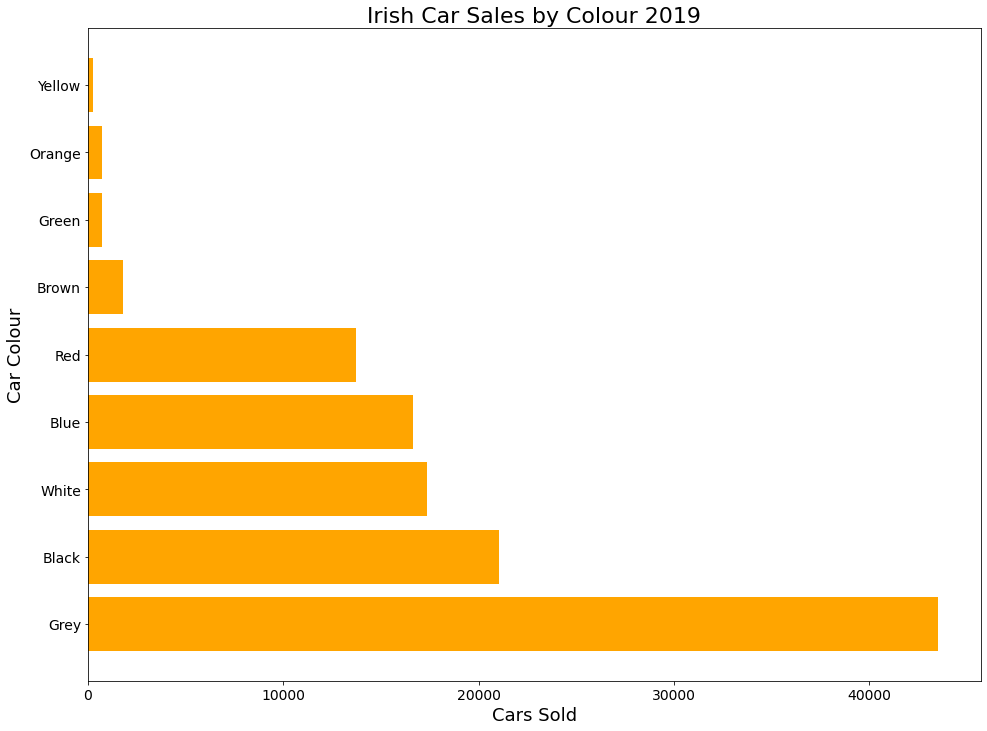

In [842]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and colour data from the dataset
plt.barh(colour_sales_df["Colour"], colour_sales_df["2019 Units"], color='orange')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Colour', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Colour 2019", size=22)

For each colour to be used in the data a dictionary to tie the 3 year % deprecation added. This data was got from iseecars.com's study of 1.3 million car sales [4].

In [843]:
colour_deprecation = {"Grey": 29.5,
                      "Black": 30.2,
                      "White": 29.5,
                      "Blue": 29.9,
                      "Red": 29.1,
                      "Brown": 28.5,
                      "Green": 24.5,
                      "Orange": 21.6,
                      "Yellow": 22.0}

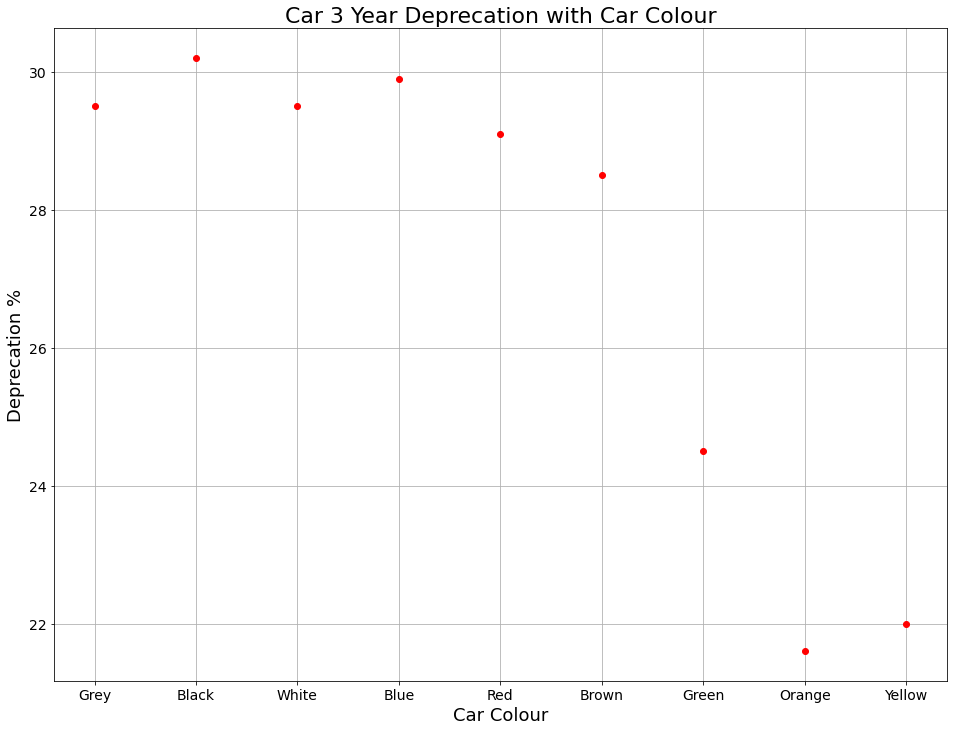

In [844]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A graph with red dots for each data point
plt.plot(*zip(*colour_deprecation.items()), "or")
# Add labels to the x,y axis and increase size
plt.xlabel('Car Colour', size=18)
plt.ylabel('Deprecation %', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Car 3 Year Deprecation with Car Colour", size=22)
# Add grid to graph
plt.grid(True)

For the price data for the cars it was taken from the archives of the Society of the Irish Motor Industry price guides using pricing information from each manufacture [2]. All data used the January 2019 edition of this guide bar the C-HR, KONA and TUCSON car models. For the KONA and TUSCON the data was gotten from the December 2019 guide as they were not on the January one. The C-HR wasnt on either so price data was gotten from Toyotas website using the August 2021 values [5].

This data was collated and added to an excel for the project so it could be read to get the information to create pricing for each car in the synthesised dataset.

In [845]:
model_prices_df = pd.read_excel("model-price.xlsx")

In [846]:
model_prices_df

,MODEL,PRICE,Date
0,YARIS,14995,2019-01-01
1,YARIS,15995,2019-01-01
2,YARIS,16090,2019-01-01
3,YARIS,17505,2019-01-01
4,YARIS,15995,2019-01-01
5,YARIS,16500,2019-01-01
6,YARIS,16595,2019-01-01
7,YARIS,17995,2019-01-01
8,YARIS,17350,2019-01-01
9,YARIS,18780,2019-01-01


In [847]:
# Get standard deviation and mean for each models price
# Lists hold data for standard deviation and mean
mean_list = []
std_list = []

# Get all unique car models to a series
unique_car_models = model_prices_df["MODEL"].unique()

# For every model calcuate the mean and std values
for car_model in unique_car_models:
    mean_list.append(model_prices_df[model_prices_df["MODEL"] == car_model].mean()[0])
    std_list.append(model_prices_df[model_prices_df["MODEL"] == car_model].std()[0])
    

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [848]:
# Create dataframe for graphing and using for creating synthesised dataset
model_prices_stats_df = pd.DataFrame(list(zip(unique_car_models, mean_list, std_list)),
               columns =["MODEL", "MEAN", "STD"])

In [849]:
model_prices_stats_df

,MODEL,MEAN,STD
0,YARIS,17379.285714,1396.199315
1,TUCSON,35620.000000,5731.194545
2,OCTAVIA,29230.500000,4879.995389
3,QASHQAI,32078.518519,3404.640164
4,FIESTA,19896.176471,2261.143605
5,FOCUS,29503.125000,5164.211039
6,GOLF,24867.222222,2834.347481
7,MICRA,17145.000000,1322.875656
8,TIGUAN,36086.250000,4317.375815
9,COROLLA,23838.750000,1942.413355


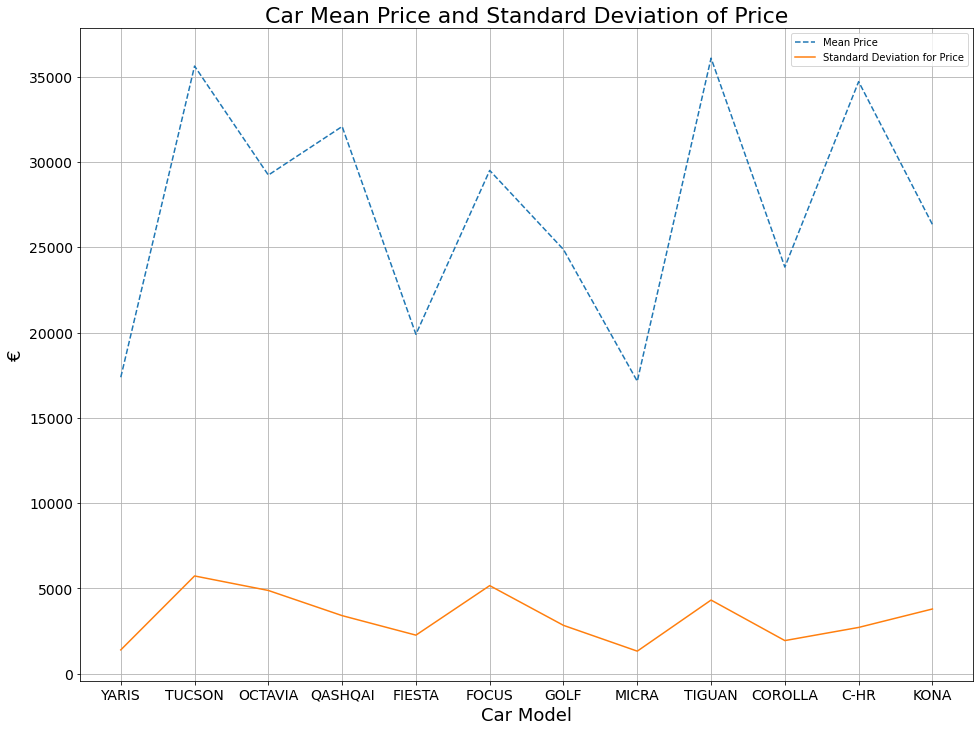

In [850]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# Two graphs for mean price and standard deviation for car models with different lines
plt.plot(model_prices_stats_df["MODEL"], model_prices_stats_df["MEAN"], "--")
plt.plot(model_prices_stats_df["MODEL"], model_prices_stats_df["STD"], "-")
# Add labels to the x,y axis and increase size
plt.xlabel('Car Model', size=18)
plt.ylabel('€', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Car Mean Price and Standard Deviation of Price", size=22)
# Add grid to graph
plt.grid(True)
plt.legend(["Mean Price", "Standard Deviation for Price"])

### Creating the Simulated Data

Next Pandas and Numpy can be used to create the simulated data using the real world data gathered and analysed earlier to dataframes. A dataframe will be created to hold all the new data of 1000 simulated rows.

In [851]:
# Get the probability for each car to help create a non-uniform distribution
car_model_sales_df["Probability"] = car_model_sales_df["2019 Units"]/car_model_sales_df["2019 Units"].sum()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [852]:
# Display dataframe with probability
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share,Probability
0,1,TOYOTA,COROLLA,4406,3.76,0.119443
1,2,HYUNDAI,TUCSON,3828,3.27,0.103774
2,3,NISSAN,QASHQAI,3748,3.20,0.101605
3,4,VOLKSWAGEN,TIGUAN,3201,2.73,0.086776
4,5,SKODA,OCTAVIA,3199,2.73,0.086722
5,6,HYUNDAI,KONA,2939,2.51,0.079674
6,7,VOLKSWAGEN,GOLF,2823,2.41,0.076529
7,8,FORD,FOCUS,2766,2.36,0.074984
8,9,TOYOTA,YARIS,2554,2.18,0.069237
9,10,TOYOTA,C-HR,2503,2.14,0.067854


Using the probabilites gotten from the real world data and numpy's random choice function will help create the data. This will be a non-uniform random sample as the probability is being fed to the function. The data should be non-uniform as the make of car is tied to the number of sales so the real world probabilities will be used. 1000 non-uniform random values will be generated.

In [853]:
random_models = np.random.choice(car_model_sales_df["Model"], 1000, p=car_model_sales_df["Probability"])

In [854]:
# Create a dataframe to hold all the simulate data
car_simulated_df = pd.DataFrame({'Model': random_models})

In [855]:
# Display the first 30 records of the dataset with its variable so far
car_simulated_df.head(30)

,Model
0,OCTAVIA
1,KONA
2,OCTAVIA
3,GOLF
4,OCTAVIA
5,YARIS
6,FOCUS
7,FOCUS
8,TUCSON
9,QASHQAI


In [856]:
# Get and print the total of each make of car
total_simulated_cars = car_simulated_df.Model.value_counts()
total_simulated_cars

TIGUAN     113
COROLLA    112
QASHQAI    109
TUCSON     104
KONA        88
OCTAVIA     88
FIESTA      80
FOCUS       70
GOLF        65
YARIS       62
MICRA       57
C-HR        52
Name: Model, dtype: int64

Text(0.5, 1.0, 'Irish Car Sales by Make - Simulated')

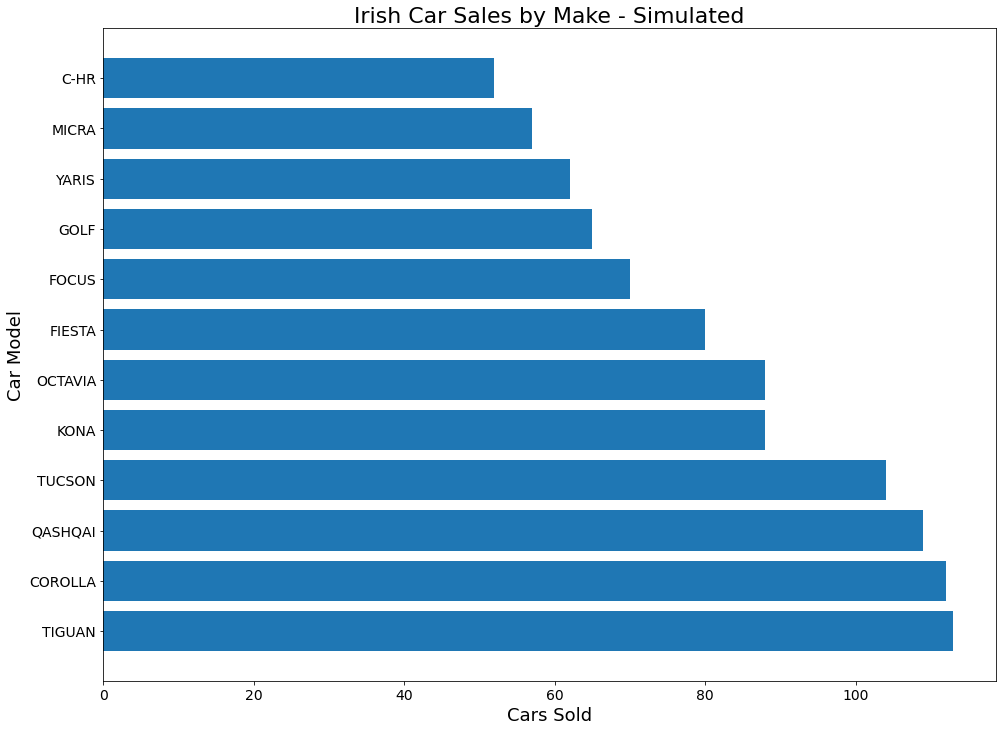

In [857]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the car model data from the dataset by counting the occurances of each item
plt.barh(total_simulated_cars.index, total_simulated_cars)
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Model', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Make - Simulated", size=22)

Next the county data will be appended to the dataset. Like make this data has a non-uniform distribution accross the 26 counties. For example a car sale in Dublin has a far higher probability than any other county. The probability of each item will be calculated and used with numpy's random choice function to generate random countys for 1000 values.

In [858]:
# Get the probability for each car to be sold in a given county to help create a non-uniform distribution
county_sales_df["Probability"] = county_sales_df["2019 Units"]/county_sales_df["2019 Units"].sum()

In [859]:
# Display dataframe with probability
county_sales_df

,County,2019 Units,% Share,Probability
0,Carlow,1255,1.07,0.010717
1,Cavan,1167,1.00,0.009965
2,Clare,2245,1.92,0.019170
3,Cork,13981,11.94,0.119385
4,Donegal,2331,1.99,0.019905
5,Dublin,52067,44.46,0.444603
6,Galway,4300,3.67,0.036718
7,Kerry,2310,1.97,0.019725
8,Kildare,4452,3.80,0.038016
9,Kilkenny,2066,1.76,0.017642


In [860]:
# Using random choice to generate 1000 non-uniform county values
random_counties = np.random.choice(county_sales_df["County"], 1000, p=county_sales_df["Probability"])

In [861]:
# Append the county data to the dataset and print it
car_simulated_df["County"] = random_counties
car_simulated_df.head(30)

,Model,County
0,OCTAVIA,Kilkenny
1,KONA,Meath
2,OCTAVIA,Galway
3,GOLF,Dublin
4,OCTAVIA,Kerry
5,YARIS,Dublin
6,FOCUS,Dublin
7,FOCUS,Dublin
8,TUCSON,Cork
9,QASHQAI,Louth


In [862]:
# Get and print the total of each county
total_simulated_county = car_simulated_df.County.value_counts()
total_simulated_county

Dublin       462
Cork          91
Limerick      42
Kildare       38
Meath         35
Galway        35
Wexford       28
Wicklow       27
Clare         26
Kilkenny      25
Louth         25
Waterford     23
Donegal       21
Tipperary     20
Kerry         14
Westmeath     12
Mayo          12
Offaly        11
Sligo          9
Laois          9
Cavan          8
Carlow         7
Roscommon      6
Monaghan       6
Leitrim        6
Longford       2
Name: County, dtype: int64

Text(0.5, 1.0, 'Irish Car Sales by County - Simulated')

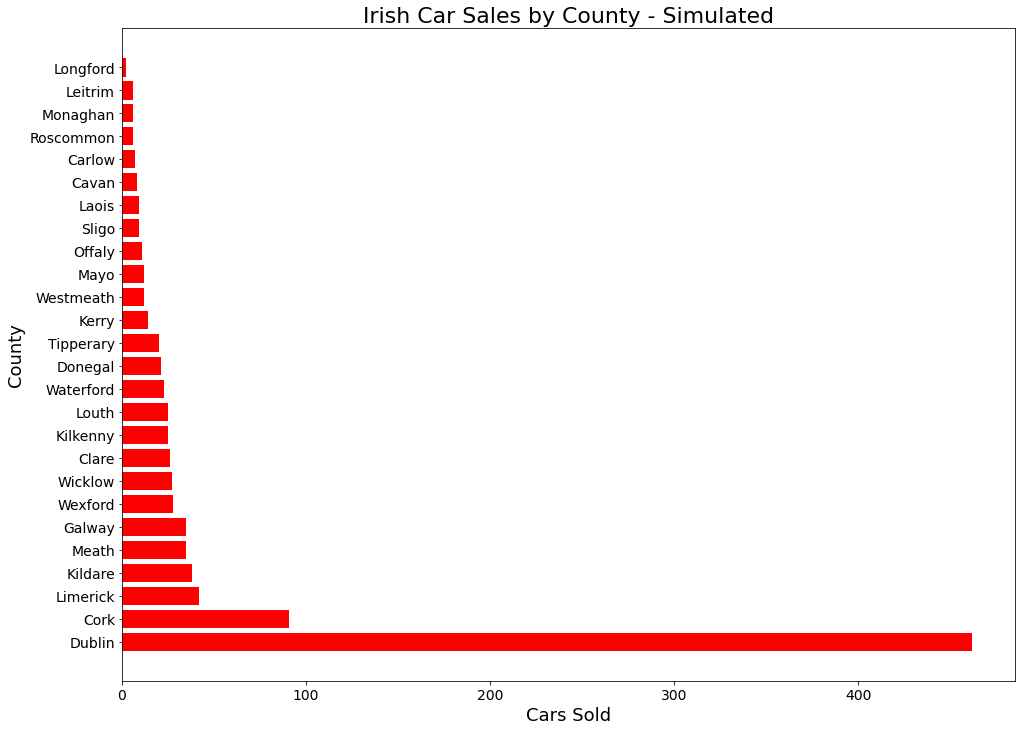

In [863]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the simulated sales and county data in red
plt.barh(total_simulated_county.index, total_simulated_county, color='red')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('County', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by County - Simulated", size=22)

Next the month data will be appended to the dataset. Like make and month this data has a non-uniform distribution accross the 12 months. For example January and July have far higher sales than other months and data needs that weigth applied. Similar then the probability of each item will be calculated and used with numpy's random choice function to generate random months.

In [864]:
# Get the probability for each car to be sold in a given month to help create a non-uniform distribution
montly_sales_df["Probability"] = montly_sales_df["Sales"]/montly_sales_df["Sales"].sum()

In [865]:
# Display dataframe with probability
montly_sales_df

,Sales,Probability
Jan,32370,0.276409
Feb,15069,0.128675
Mar,16687,0.142491
Apr,8904,0.076032
May,6320,0.053967
Jun,1408,0.012023
Jul,24681,0.210752
Aug,5088,0.043447
Sep,3418,0.029186
Oct,2179,0.018607


In [866]:
# Using random choice to generate 1000 non-uniform month values
random_months = np.random.choice(montly_sales_df.index, 1000, p=montly_sales_df["Probability"])

In [867]:
# Append the month sold data to the dataset and print it
car_simulated_df["Month"] = random_months
car_simulated_df.head(30)

,Model,County,Month
0,OCTAVIA,Kilkenny,Jul
1,KONA,Meath,Mar
2,OCTAVIA,Galway,Jul
3,GOLF,Dublin,Mar
4,OCTAVIA,Kerry,Mar
5,YARIS,Dublin,Mar
6,FOCUS,Dublin,Aug
7,FOCUS,Dublin,Jan
8,TUCSON,Cork,Jan
9,QASHQAI,Louth,Mar


In [868]:
# Get and print the total of each months sales
total_simulated_month = car_simulated_df.Month.value_counts()
total_simulated_month

Jan    304
Jul    211
Mar    132
Feb    126
Apr     75
May     55
Aug     34
Sep     31
Jun     13
Oct     10
Nov      5
Dec      4
Name: Month, dtype: int64

Text(0.5, 1.0, 'Irish Car Sales by Month - Simulated')

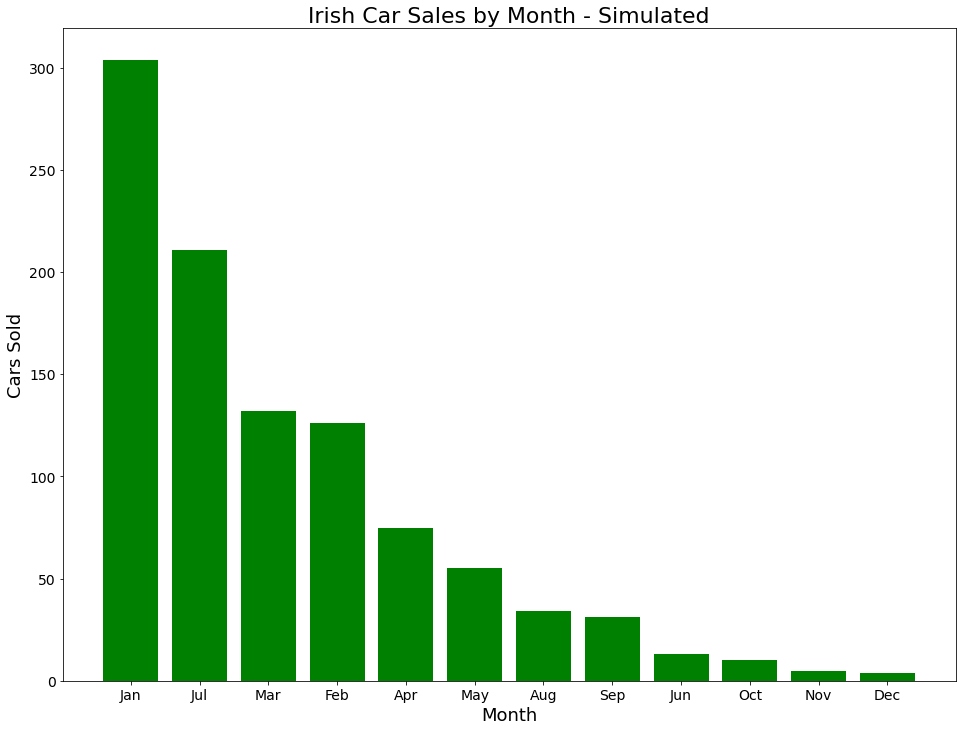

In [869]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the simulated sales and month data in green
plt.bar(total_simulated_month.index, total_simulated_month, color='green')
# Add labels to the x,y axis and increase size
plt.xlabel('Month', size=18)
plt.ylabel('Cars Sold', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Month - Simulated", size=22)

Colour is also going to be added and the distrbution of sales to a colour can vary alot similar to month and county depending on the value. For example grey and black car sales are more popular than yellow or ornage so to create the data for colour then the probabilities from the real world will be used to help here. Numpys random choice function will once again be the function of choice.

In [870]:
# Get the probability for each car to be sold in a given colour to help create a non-uniform distribution
colour_sales_df["Probability"] = colour_sales_df["2019 Units"]/colour_sales_df["2019 Units"].sum()

In [871]:
# Display dataframe with probability
colour_sales_df

,Rank,Colour,2019 Units,% Share,Probability
0,1,Grey,43535,37.17,0.376021
1,2,Black,21021,17.95,0.181563
2,3,White,17359,14.82,0.149933
3,4,Blue,16666,14.23,0.143948
4,5,Red,13710,11.71,0.118416
5,6,Brown,1791,1.53,0.015469
6,7,Green,730,0.62,0.006305
7,8,Orange,714,0.61,0.006167
10,11,Yellow,252,0.22,0.002177


In [872]:
# Using random choice to generate 1000 non-uniform colour values
random_colours = np.random.choice(colour_sales_df["Colour"], 1000, p=colour_sales_df["Probability"])

In [873]:
# Append the colour of each car sold to the dataset and print it
car_simulated_df["Colour"] = random_colours
car_simulated_df.head(30)

,Model,County,Month,Colour
0,OCTAVIA,Kilkenny,Jul,Red
1,KONA,Meath,Mar,Grey
2,OCTAVIA,Galway,Jul,Grey
3,GOLF,Dublin,Mar,Black
4,OCTAVIA,Kerry,Mar,Black
5,YARIS,Dublin,Mar,Blue
6,FOCUS,Dublin,Aug,White
7,FOCUS,Dublin,Jan,Grey
8,TUCSON,Cork,Jan,Grey
9,QASHQAI,Louth,Mar,Grey


In [874]:
# Get and print the total of each car colours sales
total_simulated_colour = car_simulated_df.Colour.value_counts()
total_simulated_colour

Grey      391
Black     184
White     148
Red       122
Blue      121
Brown      17
Green      11
Orange      5
Yellow      1
Name: Colour, dtype: int64

Text(0.5, 1.0, 'Irish Car Sales by Colour  Simulated')

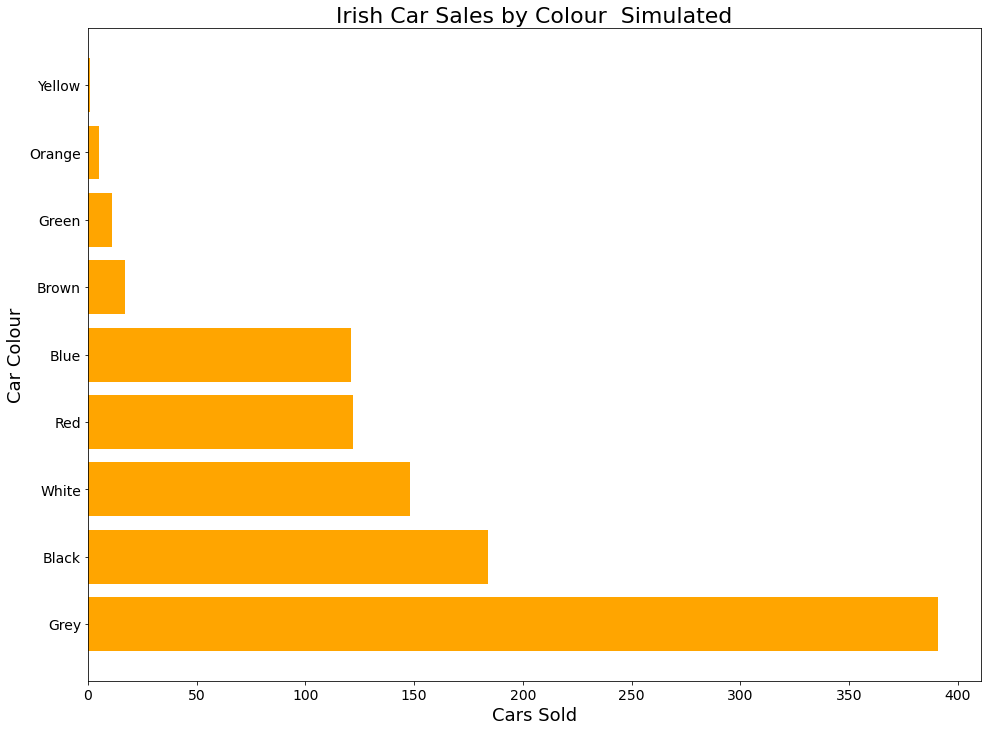

In [875]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and colour data from the simulated dataset
plt.barh(total_simulated_colour.index, total_simulated_colour, color='orange')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Colour', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Colour  Simulated", size=22)

Car make is tied directly to car model so the dataset will be iterated and a car make matched to mdel and added to it.

In [876]:
# Lists to hold values while iterating the dataset for appending as new columns after
simulated_make_list = []
simulated_price_list = []
simulated_deprecation_list = []

In [877]:
# Iterate dataframe to tie Make to Model
for index, row in car_simulated_df.iterrows():
    # Get the value for the car model
    car_make = row["Model"]
    # Get the matching make for the model from the earlier dataset
    simulated_make_list.append(car_model_sales_df[car_model_sales_df["Model"] == car_make]["Make"].iloc[0])    

In [878]:
# Append the car make data to the dataset and print it
car_simulated_df["Make"] = simulated_make_list
car_simulated_df.head(30)

,Model,County,Month,Colour,Make
0,OCTAVIA,Kilkenny,Jul,Red,SKODA
1,KONA,Meath,Mar,Grey,HYUNDAI
2,OCTAVIA,Galway,Jul,Grey,SKODA
3,GOLF,Dublin,Mar,Black,VOLKSWAGEN
4,OCTAVIA,Kerry,Mar,Black,SKODA
5,YARIS,Dublin,Mar,Blue,TOYOTA
6,FOCUS,Dublin,Aug,White,FORD
7,FOCUS,Dublin,Jan,Grey,FORD
8,TUCSON,Cork,Jan,Grey,HYUNDAI
9,QASHQAI,Louth,Mar,Grey,NISSAN


For price a normal distribution will be used taking in and using the mean and standard deviation values measured from the real world data and using numpys random normal function to simulate the new price data for initial sale. For this it may have been better to calculate when interating the dataframe for car Make but for the purpose of notebook readability it will be itered seperatly to do price. 

In [879]:
# Dictionary to hold STD and Mean per model
price_stats_dict = {}

In [880]:
# Iterate dataframe to create a dictionary for quickly finding STD and Mean without searching the Dataframe 1000 times
for index, row in model_prices_stats_df.iterrows():
     price_stats_dict[row["MODEL"]] = {"STD": row["STD"],
                                      "MEAN": row["MEAN"]}

In [881]:
# Iterate dataframe to tie Price to Make but using normal distribution to get a value for the price
for index, row in car_simulated_df.iterrows():
    # Get the value for the car model
    car_make = row["Model"]
    
    # Get the corresponding STD and Mean values
    car_mean = price_stats_dict[car_make]["MEAN"]
    car_std = price_stats_dict[car_make]["STD"]
    
    # Using normal distribution to get a value for the price for the car based on the model
    car_price = np.random.normal(car_mean, car_std)
    
    # Round the price to the nearest €5 as per the car companys prices
    car_price = 5 * round(car_price/5)
    
    # Save to list for appending
    simulated_price_list.append(car_price)

In [882]:
# Append the car price data to the dataset and print it
car_simulated_df["Price"] = simulated_price_list
car_simulated_df.head(30)

,Model,County,Month,Colour,Make,Price
0,OCTAVIA,Kilkenny,Jul,Red,SKODA,27300
1,KONA,Meath,Mar,Grey,HYUNDAI,21360
2,OCTAVIA,Galway,Jul,Grey,SKODA,26015
3,GOLF,Dublin,Mar,Black,VOLKSWAGEN,24040
4,OCTAVIA,Kerry,Mar,Black,SKODA,32115
5,YARIS,Dublin,Mar,Blue,TOYOTA,17350
6,FOCUS,Dublin,Aug,White,FORD,33955
7,FOCUS,Dublin,Jan,Grey,FORD,24520
8,TUCSON,Cork,Jan,Grey,HYUNDAI,34845
9,QASHQAI,Louth,Mar,Grey,NISSAN,37750


Car 3 year deprecation has been above matched to the colour of the car. The dataframe will once again be ran through to calculate a 3 year selling price with deprication.

In [883]:
colour_deprecation

{'Grey': 29.5,
 'Black': 30.2,
 'White': 29.5,
 'Blue': 29.9,
 'Red': 29.1,
 'Brown': 28.5,
 'Green': 24.5,
 'Orange': 21.6,
 'Yellow': 22.0}

In [884]:
# Iterate dataframe to tie 3 Year Deprication Price to Colour and Sale Price
for index, row in car_simulated_df.iterrows():
    # Get the value for the car colour
    car_colour = row["Colour"]
    # Get the value for the car price
    car_sales_price = row["Price"]
    # Get the colour deprecation value    
    car_dep = colour_deprecation[car_colour]
    
    # Calculate the 3 year resale price of the car
    car_3_year_sale_price = car_sales_price - ((car_dep * car_sales_price) / 100.0)
    
    # Round the price to the nearest €5 as per the car companys prices
    car_3_year_sale_price = 5 * round(car_3_year_sale_price/5)
    
    # Save to list for appending
    simulated_deprecation_list.append(car_3_year_sale_price)    

In [885]:
# Append the car 3 year resale price data to the dataset and print it
car_simulated_df["Year 3 Resale Price"] = simulated_deprecation_list
car_simulated_df.head(30)

,Model,County,Month,Colour,Make,Price,Year 3 Resale Price
0,OCTAVIA,Kilkenny,Jul,Red,SKODA,27300,19355
1,KONA,Meath,Mar,Grey,HYUNDAI,21360,15060
2,OCTAVIA,Galway,Jul,Grey,SKODA,26015,18340
3,GOLF,Dublin,Mar,Black,VOLKSWAGEN,24040,16780
4,OCTAVIA,Kerry,Mar,Black,SKODA,32115,22415
5,YARIS,Dublin,Mar,Blue,TOYOTA,17350,12160
6,FOCUS,Dublin,Aug,White,FORD,33955,23940
7,FOCUS,Dublin,Jan,Grey,FORD,24520,17285
8,TUCSON,Cork,Jan,Grey,HYUNDAI,34845,24565
9,QASHQAI,Louth,Mar,Grey,NISSAN,37750,26615


## Final Simulated Dataset

In [886]:
car_simulated_df

,Model,County,Month,Colour,Make,Price,Year 3 Resale Price
0,OCTAVIA,Kilkenny,Jul,Red,SKODA,27300,19355
1,KONA,Meath,Mar,Grey,HYUNDAI,21360,15060
2,OCTAVIA,Galway,Jul,Grey,SKODA,26015,18340
3,GOLF,Dublin,Mar,Black,VOLKSWAGEN,24040,16780
4,OCTAVIA,Kerry,Mar,Black,SKODA,32115,22415
5,YARIS,Dublin,Mar,Blue,TOYOTA,17350,12160
6,FOCUS,Dublin,Aug,White,FORD,33955,23940
7,FOCUS,Dublin,Jan,Grey,FORD,24520,17285
8,TUCSON,Cork,Jan,Grey,HYUNDAI,34845,24565
9,QASHQAI,Louth,Mar,Grey,NISSAN,37750,26615


### References
[1] Motorstats - Offical Statistics of the Irish Motor Industry
https://stats.beepbeep.ie/

[2] The Society of the Irish Motor Industry Price Data 
https://www.simi.ie/en/motorstats/recommended-price-guide   

[3] Which car colour will have the best impact on resale value?
https://www.junair-spraybooths.co.uk/blog/which-car-colour-is-best-resale-value/

[4] Color Does Matter in Car Resale Value
https://www.iseecars.com/car-color-study#v=2016

[5] Toyota C-HR Price Data (Accesed 30th August 2021)
https://www.toyota.ie/models/c-hr/index.json
 